In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

# Problem 1

Use the natural embedding algorithm to create a bifurcation diagram for the differential equation

x = λx − x^3

This type of bifurcation is called a pitchfork bifurcation (you should see a pitchfork in your
diagram)

In [63]:
#dont need to change the Embedding Alg function code at all: just have to change the code for the diff
#eq and the initial guess
#in EmbeddingAlg func: 1st parameter is linspace of the lambda values going to be looking over
#2nd parameter is initial guess

#implements natural embedding algorithm:
def EmbeddingAlg(param_list, guess, F):
    X = []
    for param in param_list:
        try:
            #solve for x_value making F(x_value, param) = 0
            x_value = newton(F, guess, fprime=None, args=(param,), tol=1E-7, maxiter=50)
            #record the solution and update guess for the next iteration
            X.append(x_value)
            guess = x_value
        except RuntimeError:
            #if Newton's method fails, return a truncated list of parameters w/ corresponding x values
            return param_list[:len(X)], X
        
    #return the list of parameters and the corresponding x values
    return param_list, X

#define differential equation have:
def F(x, lmbda):
    return lmbda*x - (x**3)

#use algorithm to find curves in bifurcation diagram: will have 3 curves
#told want domain to go from high to low
C_1, X_1 = EmbeddingAlg(np.linspace(5, -5, 200), 0, F)   #want pitchfork w/ line at 0, so make one of initial guesses 0 (what always do w/ bifurcation diagrams) 
C_2, X_2 = EmbeddingAlg(np.linspace(5, -5, 200), np.sqrt(3), F)  #want other guesses to be sqrt(lambda), -sqrt(lambda) bc if you solve for solutions: they will have this form
C_3, X_3 = EmbeddingAlg(np.linspace(5, -5, 200), -np.sqrt(3), F) #so we will just make random guesses for lambda value. solved for solution guess form in prob 6.1 in vol 4 HW

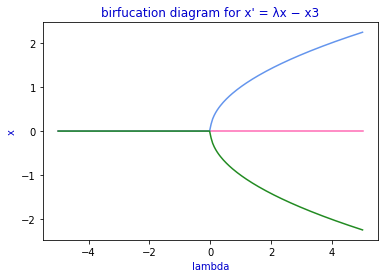

In [64]:
#plot the curves now:
plt.plot(C_1, X_1, color = "hotpink")
plt.plot(C_2, X_2, color = "cornflowerblue")
plt.plot(C_3, X_3, color = "forestgreen")
plt.xlabel("lambda", color = "mediumblue")
plt.ylabel("x", color = "mediumblue")
plt.title("birfucation diagram for x' = λx − x3", color = "mediumblue")
plt.show()

# Problem 2
Create bifurcation diagrams for the diffrential equation

x = η + λx − x^3,

where η = −1, −.2, .2 and 1. Notice that when η = 0 you can see the pitchfork bifurcation of
the previous problem. T

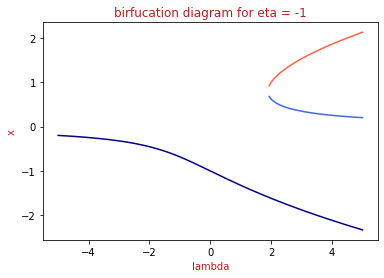

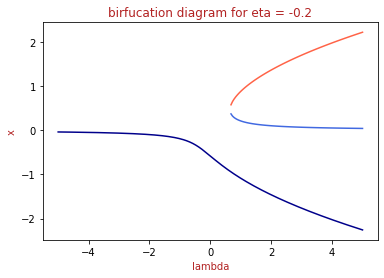

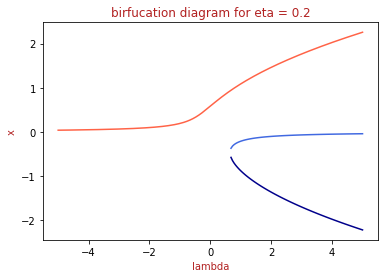

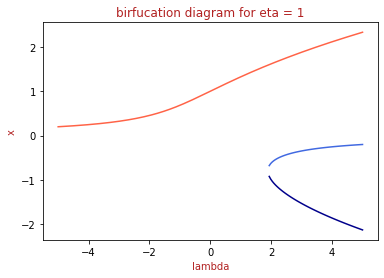

In [65]:
#define the 4 differential equations have:
#diff eq w/ eta = -1
def F1(x, lmbda):
    return -1 + (lmbda*x) - (x**3)

#diff eq w/ eta = -.2
def F2(x, lmbda):
    return -0.2 + (lmbda*x) - (x**3)

#diff eq w/ eta = .2
def F3(x, lmbda):
    return 0.2 + (lmbda*x) - (x**3)

#diff eq w/ eta = 1
def F4(x, lmbda):
    return 1 + (lmbda*x) - (x**3)

#now get/plot bifurcation diagrams for all funcs have:
eta_vals = [-1, -0.2, 0.2, 1]
F_funcs = [F1, F2, F3, F4]

#will get bifurcation diagram same way for each function have so just loop through each eta, function have:
#w/ bifurcation diagrams always have guess eta = 0, neg num and then a pos num
for eta, F in zip(eta_vals, F_funcs):
    C1, X1 = EmbeddingAlg(np.linspace(5, -5, 200), 0, F)
    C2, X2 = EmbeddingAlg(np.linspace(5, -5, 200), np.sqrt(5), F)
    C3, X3 = EmbeddingAlg(np.linspace(5, -5, 200), -np.sqrt(5), F)
    
    plt.plot(C1, X1, color = "royalblue")
    plt.plot(C2, X2, color = "tomato")
    plt.plot(C3, X3, color = "darkblue")
    plt.title("birfucation diagram for eta = " + str(eta), color = "firebrick")
    plt.xlabel("lambda", color = "firebrick")
    plt.ylabel("x", color = "firebrick")
    plt.show()

### Problem 3 - Hysteresis

Reproduce the bifurcation diagram for the differential equation

dx/dτ = rx(1 − x/k) −x^2/(1 + x)^2,

where r = 0.56

/tmp/ipykernel_3631/3536680058.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(C1_, X1_,'k', label = "Stable Equilibria", color = "mediumblue")
/tmp/ipykernel_3631/3536680058.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(C2_, X2_, 'k', color = "mediumblue")
/tmp/ipykernel_3631/3536680058.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot(C3_, X3_, '--k', label = "Unstable Equilibria", color = "royalblue")


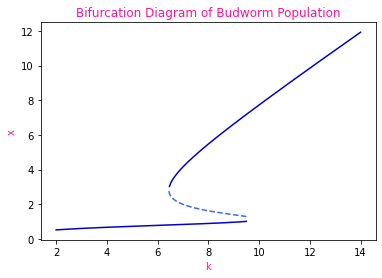

In [66]:
r = 0.56
#define differential equation have:
diff = lambda x, k: r*x*(1-(x/k)) - (x**2)/(1+x**2)

#now make curves using the algorithm:
#just make a bunch of guesses to get the linspace want and guesses want
C1_, X1_ = EmbeddingAlg(np.linspace(14, 0.01, 300), 8, diff)
C2_, X2_ = EmbeddingAlg(np.linspace(9.5, 2, 200), 1, diff)
C3_, X3_ = EmbeddingAlg(np.linspace(9.5, 6.4, 200), 3, diff)

#now plot the birfucation diagram
plt.plot(C1_, X1_,'k', label = "Stable Equilibria", color = "mediumblue")
plt.plot(C2_, X2_, 'k', color = "mediumblue")
plt.plot(C3_, X3_, '--k', label = "Unstable Equilibria", color = "royalblue")
plt.xlabel("k", color = "deeppink")
plt.ylabel("x", color = "deeppink")
plt.title("Bifurcation Diagram of Budworm Population", color = "deeppink")
plt.show()